In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization ,Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights= True, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

In [ ]:
def build_model():
  model = Sequential([
      Flatten(input_shape=(32,32,3)),
      Dense(512, activation='relu'),
      BatchNormalization(),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
  ])
  return model

In [ ]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'],)
history_SGD = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stop, checkpoint, reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3375 - loss: 1.8772
Epoch 1: val_loss did not improve from 1.54412
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3376 - loss: 1.8771 - val_accuracy: 0.3667 - val_loss: 1.8054 - learning_rate: 0.0100
Epoch 2/20
1551/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 1.5801
Epoch 2: val_loss did not improve from 1.54412
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4376 - loss: 1.5800 - val_accuracy: 0.4377 - val_loss: 1.7018 - learning_rate: 0.0100
Epoch 3/20
1550/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4707 - loss: 1.5076
Epoch 3: val_loss did not improve from 1.54412
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4707 - loss: 1.5075 - val_accuracy: 0.4383 - val_loss: 1.7180 - learning_rate: 0.0100
Epoch 4/20
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4860 - loss: 1.4569
Epoch 4: val_loss did not improve from 1.54412
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'],)
history_adam = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test),callbacks=[reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2595 - loss: 2.0167 - val_accuracy: 0.2597 - val_loss: 2.0234 - learning_rate: 0.0100
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3615 - loss: 1.7663 - val_accuracy: 0.3890 - val_loss: 1.7065 - learning_rate: 0.0100
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3854 - loss: 1.7147 - val_accuracy: 0.3947 - val_loss: 1.7620 - learning_rate: 0.0100
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4073 - loss: 1.6572 - val_accuracy: 0.3928 - val_loss: 2.1768 - learning_rate: 0.0100
Epoch 5/20
1556/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4213 - loss: 1.6247
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4212 - loss: 1.6247 - val_accuracy: 0.4039 - val_loss: 1.8737 - learning_rate: 0.0100
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4540 - l

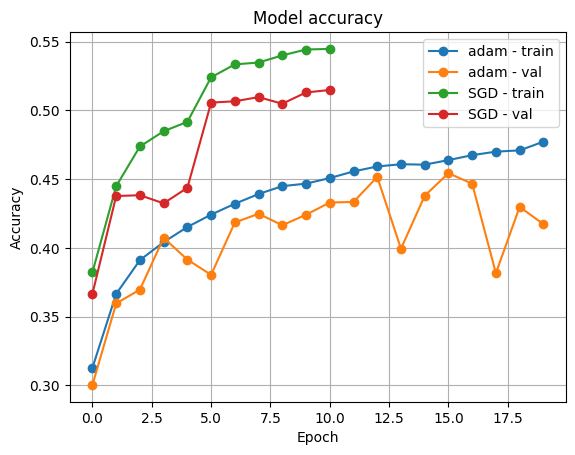

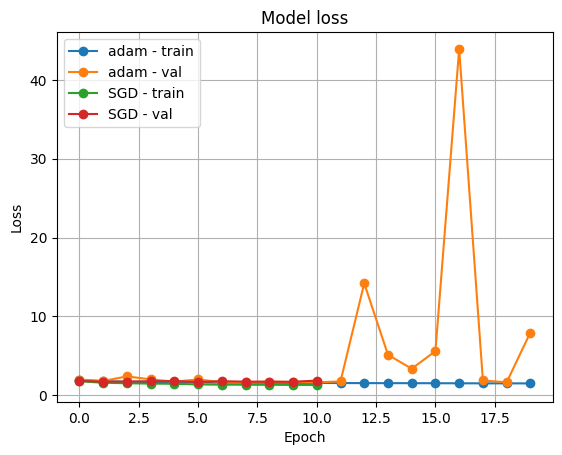

In [ ]:
plt.plot(history_adam.history['accuracy'], label='adam - train', marker='o')
plt.plot(history_adam.history['val_accuracy'], label='adam - val', marker='o')

plt.plot(history_SGD.history['accuracy'], label='SGD - train', marker='o')
plt.plot(history_SGD.history['val_accuracy'], label='SGD - val', marker='o')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_adam.history['loss'], label='adam - train', marker='o')
plt.plot(history_adam.history['val_loss'], label='adam - val', marker='o')

plt.plot(history_SGD.history['loss'], label='SGD - train', marker='o')
plt.plot(history_SGD.history['val_loss'], label='SGD - val', marker='o')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()
#